## Load functions

In [34]:
include("functions.jl")

config_probs (generic function with 1 method)

## Simulate bedsets and plot

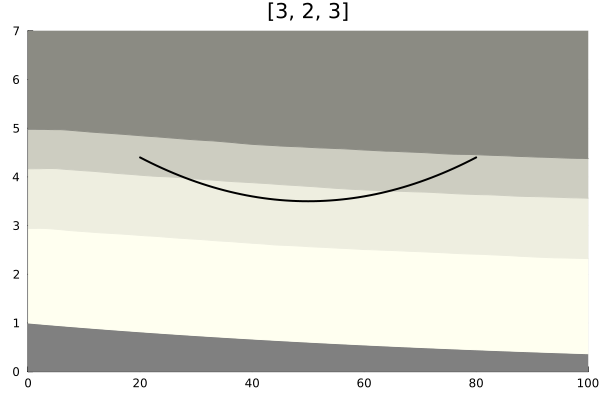

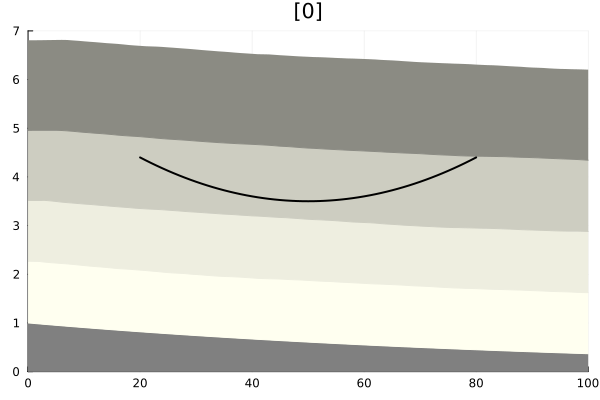

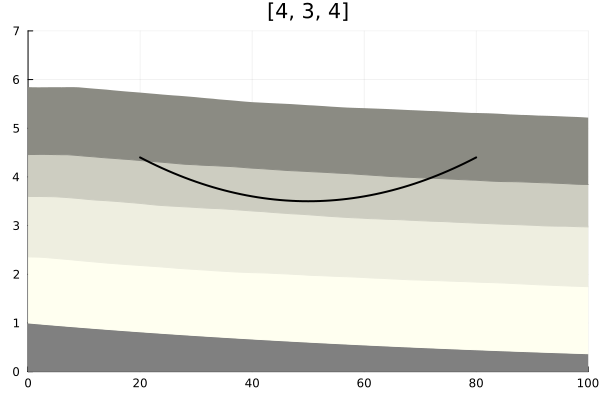

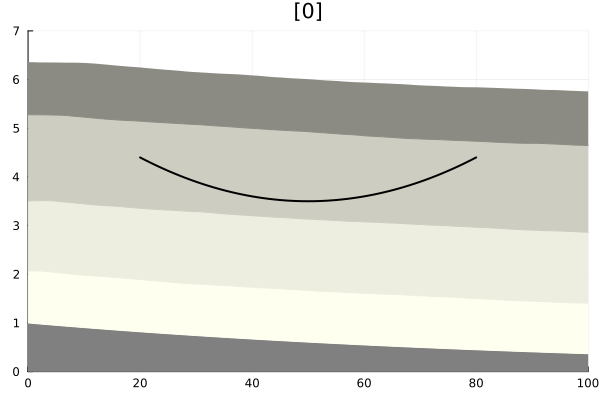

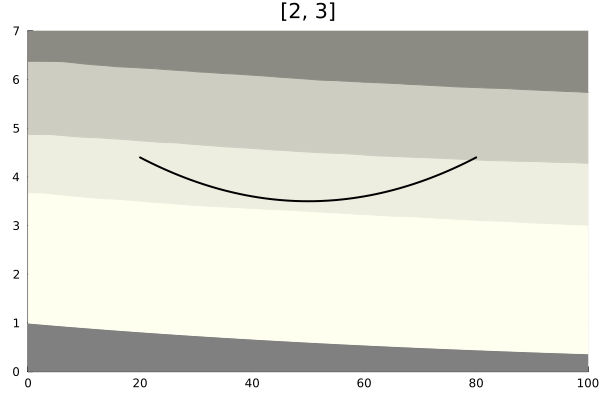

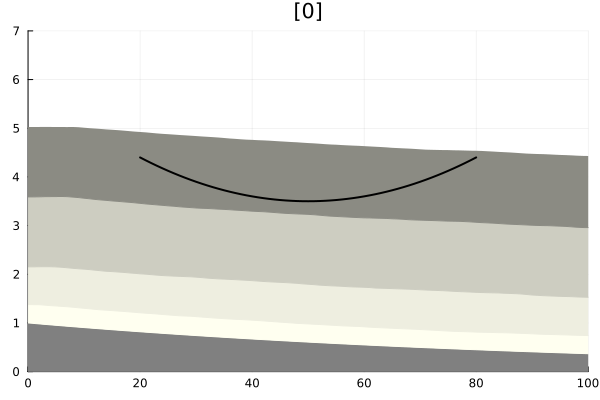

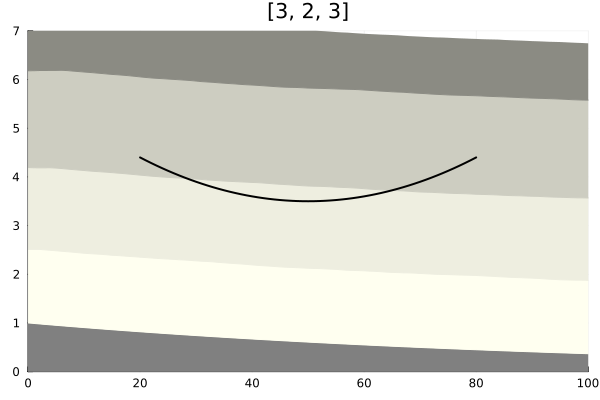

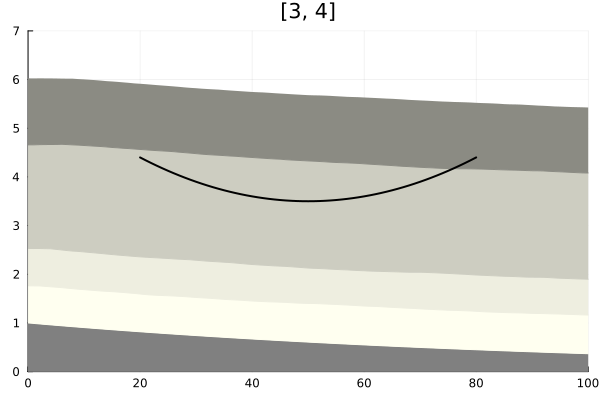

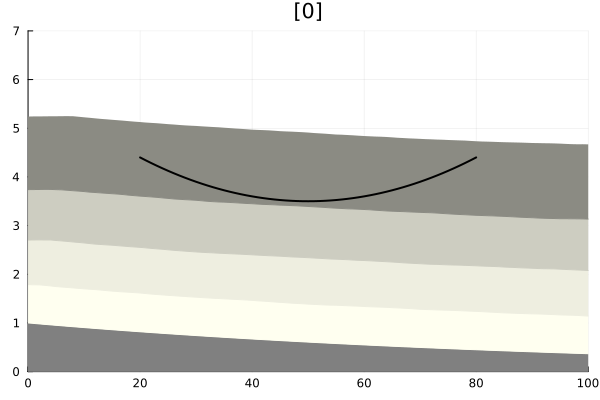

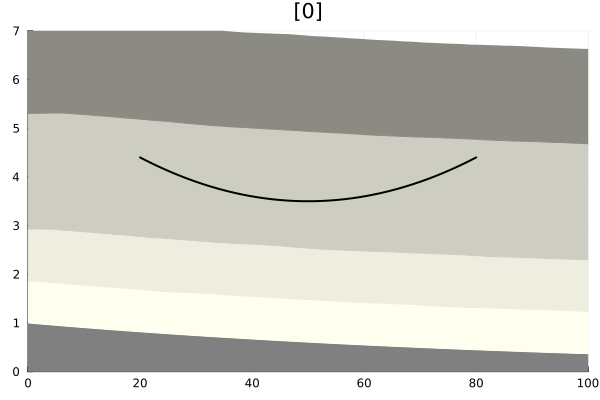

(Any[[3.0, 2.0, 3.0], [0.0], [4.0, 3.0, 4.0], [0.0], [2.0, 3.0], [0.0], [3.0, 2.0, 3.0], [3.0, 4.0], [0.0], [0.0]], Any[Any[28.158638091366225, 64.48361934009297], Any[], Any[21.259498821238267, 71.77298320201268], Any[], Any[79.19940694278756], Any[], Any[28.327971308538224, 64.9685842957853], Any[75.8684768569069], Any[], Any[]])

In [35]:
m=4
x = range(0,100,length=101)
prior_mu = [0.7,0.3]
prior_sigma = [[0.01,-0.001] [-0.001,0.1]]
grf_params = [10,1,1e-2]
cova= CovarianceFunction(1, Matern(grf_params[1], grf_params[2],σ=grf_params[3]))
grf = GaussianRandomField(cova, CirculantEmbedding(), x)
nr_realiz = 10
disp = true
configs,roots = make_sims_m(prior_mu,prior_sigma,grf_params,nr_realiz,m,disp)

## Make 100 realizations and give MC configuration distribution 

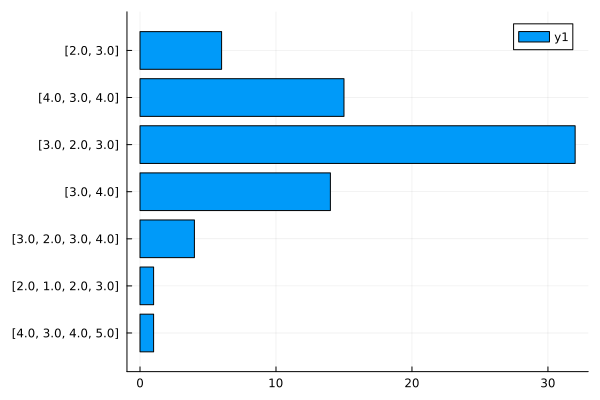

(Any[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 

In [42]:
disp = false
nr_realiz = 100
configs,roots = make_sims_m(prior_mu,prior_sigma,grf_params,nr_realiz,m,disp)
data_list,configurations = non_zero_configs(configs,roots)

## Make configuration density dataframe

In [44]:
data = zeros(length(data_list),101)
for i in 1:length(data_list)
    data[i,:] = data_list[i]
end
p_c_df = config_probs(configurations,m+1)

Row,configurations,true_count
,String,Float64
1,"[2, 3]",0.0821918
2,"[3, 4]",0.191781
3,"[3, 2, 3]",0.438356
4,"[4, 3, 4]",0.205479
5,"[2, 1, 2, 3]",0.0136986
6,"[3, 2, 3, 4]",0.0547945
7,"[4, 3, 4, 5]",0.0136986
8,"[1, 2]",0.0
9,"[2, 1]",0.0


## Approximative configuration density algorithm on simulated data

In [46]:
h = 1e-2
N = 100
p_cds = []
configs_data = []
for i in 1:length(data[:,1])
    println("nr of runs/nr of data: ", i/length(data[:,1]))
    configs = makepaths(m+1,length(findall(x->x!=0,data[i,:])))
    d = data[i,:]
    p_cd = p_c_d_alg(configs,m,d,prior_mu,prior_sigma,grf_params,p_c_df,h,N)
    append!(p_cds,[p_cd])
    append!(configs_data,[configs])
end

nr of runs/nr of data: 0.0136986301369863
nr of runs/nr of data: 0.0273972602739726
nr of runs/nr of data: 0.0410958904109589
nr of runs/nr of data: 0.0547945205479452
nr of runs/nr of data: 0.0684931506849315
nr of runs/nr of data: 0.0821917808219178
nr of runs/nr of data: 0.0958904109589041
nr of runs/nr of data: 0.1095890410958904
nr of runs/nr of data: 0.1232876712328767
nr of runs/nr of data: 0.136986301369863
nr of runs/nr of data: 0.1506849315068493
nr of runs/nr of data: 0.1643835616438356
nr of runs/nr of data: 0.1780821917808219
nr of runs/nr of data: 0.1917808219178082
nr of runs/nr of data: 0.2054794520547945
nr of runs/nr of data: 0.2191780821917808
nr of runs/nr of data: 0.2328767123287671
nr of runs/nr of data: 0.2465753424657534
nr of runs/nr of data: 0.2602739726027397
nr of runs/nr of data: 0.273972602739726
nr of runs/nr of data: 0.2876712328767123
nr of runs/nr of data: 0.3013698630136986
nr of runs/nr of data: 0.3150684931506849
nr of runs/nr of data: 0.32876712328

## Plotting distributions

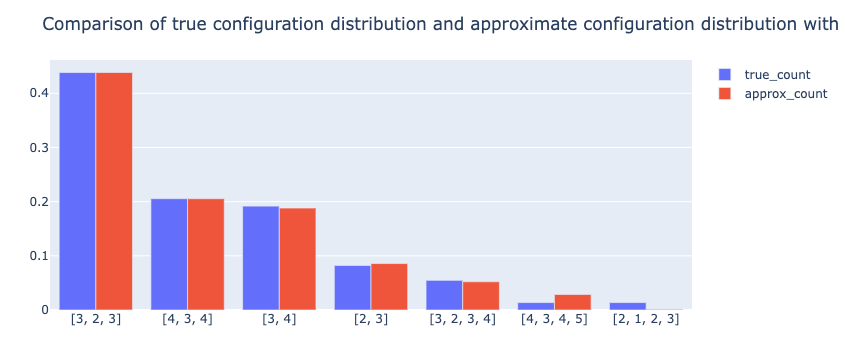

In [50]:
p_distr_flat = []
configs_flat = []
configs_flat_vals = []
for i in 1:length(p_cds)
    if length(findall(x->isnan(x),p_cds[i])) == 0
        for j in 1:length(p_cds[i])
            append!(p_distr_flat,p_cds[i][j])
            append!(configs_flat,string.([configs_data[i][j]]))
            append!(configs_flat_vals,[configs_data[i][j]])
        end
    end
end

unique_p_distr = zeros(length(unique(configs_flat)))
i = 1
for el in unique(configs_flat)
    unique_p_distr[i] = sum(p_distr_flat[findall(x->x==el,configs_flat)])
    i += 1
end

int_config = [Int.(c) for c in configurations]
counted_configs = counter(int_config)
df_data = DataFrame(configurations = string.(collect(keys(counted_configs))),true_count = collect(values(counted_configs)))
df_approx = DataFrame(configurations = unique(configs_flat)[sortperm(unique_p_distr,rev=true)],approx_count = sort(unique_p_distr,rev=true))
df_all = innerjoin(df_data, df_approx, on = :configurations)
df_all[!,"true_count"] = df_all[!,"true_count"] ./ sum(df_all[!,"true_count"])
df_all[!,"approx_count"] = df_all[!,"approx_count"] ./ sum(df_all[!,"approx_count"])
PlotlyJS.plot(
    [PlotlyJS.bar(df_all, x=:configurations, y=y, name=String(y)) for y in [:true_count, :approx_count]],
    Layout(title="Comparison of true configuration distribution and approximate configuration distribution with $nr_realiz simulations")
)

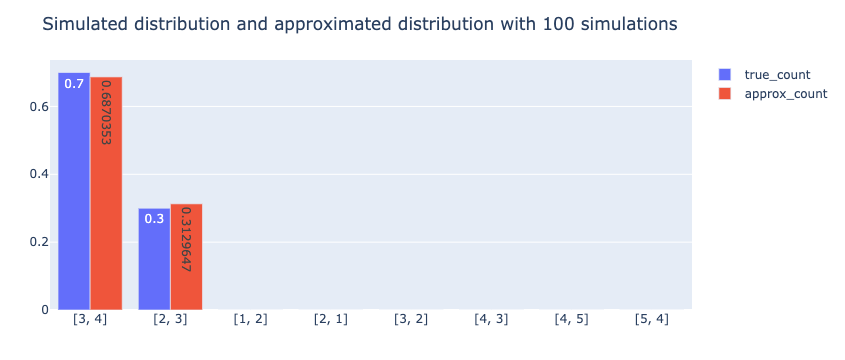

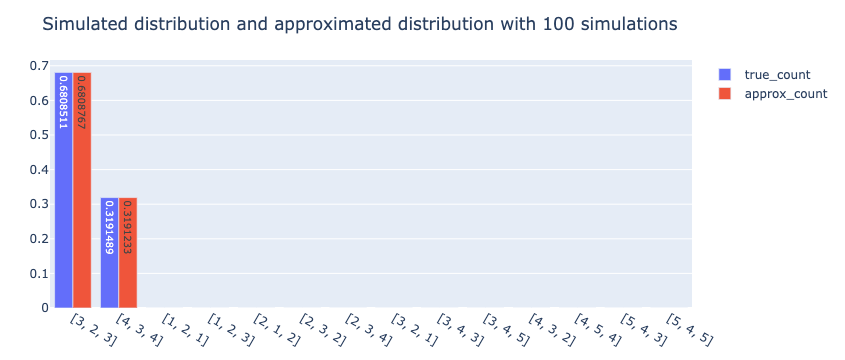

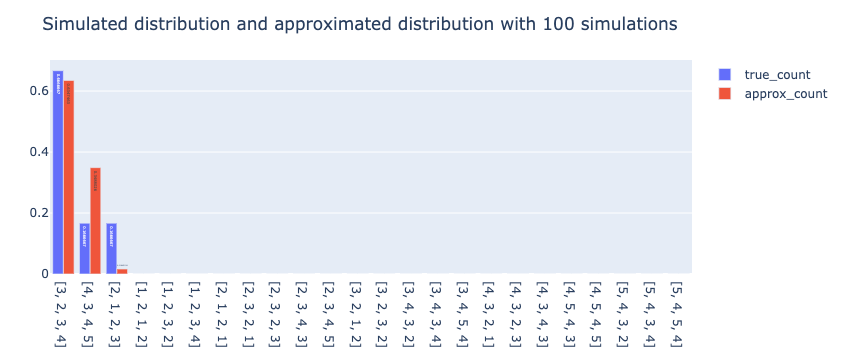

In [51]:
df_all_is = []
for i in 2:maximum([length(x) for x in int_config])
    key = findall(x->length(x)==i,int_config)
    int_config_i = int_config[key]
    config_count = counter(int_config_i)
    uniq_config_i = unique(configs_flat_vals)[sortperm(unique_p_distr,rev=true)]
    uniq_config_text = unique(configs_flat)[sortperm(unique_p_distr,rev=true)]
    appr_count = sort(unique_p_distr,rev=true)
    key2 = findall(x->length(x)==i,uniq_config_i)
    uniqs = uniq_config_i[key2]
    apprs = appr_count[key2]
    uniqs_text = uniq_config_text[key2]
    df_data_i = DataFrame(configurations = string.(collect(keys(config_count))),true_count=collect(values(config_count)))
    df_approx_i = DataFrame(configurations = uniqs_text,approx_count = apprs)
    df_all_i = outerjoin(df_data_i, df_approx_i, on = :configurations)
    df_all_i[!,"true_count"] = coalesce.(df_all_i[!,"true_count"], 0)
    df_all_i[!,"true_count"] = df_all_i[!,"true_count"] ./ sum(df_all_i[!,"true_count"])
    df_all_i[!,"approx_count"] = df_all_i[!,"approx_count"] ./ sum(df_all_i[!,"approx_count"])
    append!(df_all_is,[df_all_i])
    display(PlotlyJS.plot(
        [PlotlyJS.bar(df_all_i, x=:configurations, y=y, name=String(y),texttemplate="%{y}") for y in [:true_count, :approx_count]],
        Layout(title="Simulated distribution and approximated distribution with $nr_realiz simulations")
    ))
end

## Plotting distributions